In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AL_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	5
float64		column 3	0
float64		column 4	5
float64		column 5	10
float64		column 6	0
float64		column 7	10
float64		column 8	5
float64		column 9	10
float64		column 10	5
float64		column 11	10
float64		column 12	10
float64		column 13	5
float64		column 14	15
float64		column 15	30
float64		column 16	11
float64		column 17	15
float64		column 18	20
float64		column 19	0
float64		column 20	25
float64		column 21	31
float64		column 22	0
float64		column 23	20
float64		column 24	25
float64		column 25	35
float64		column 26	90
float64		column 27	5
float64		column 28	85
float64		column 29	91
float64		column 30	100
float64		column 31	110
float64		column 32	116
float64		column 33	0
float64		column 34	156
float64		column 35	121
float64		column 36	141
float64		column 37	15
float64		column 38	10
float64		column 39	35
float64		column 40	141
float64		column 41	0
float64		column 42	55
float64		column 43	50
float64		column 44	20
float64		

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4597.000000,4592.000000,4597.000000,4592.000000,4587.000000,4597.000000,4587.000000,4592.000000,4587.000000,4592.000000,...,4581.000000,4532.000000,4556.000000,4582.000000,4577.000000,4561.000000,4501.000000,4506.000000,4517.000000,4511.000000
mean,0.104625,0.213332,0.280433,0.065553,0.312767,0.095928,0.114495,0.105462,0.090286,0.239839,...,0.031395,0.038910,0.139395,0.016594,0.269333,0.076143,0.044676,5.226067,52.147222,285.302594
std,0.305479,1.291804,0.504121,1.396515,0.673190,0.273934,0.391991,0.401439,0.279000,0.645309,...,0.283392,0.245247,0.271410,0.106826,0.817474,0.246666,0.433804,32.047559,195.843234,610.630308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.280000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.053000,0.000000,3.714000,43.000000,270.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

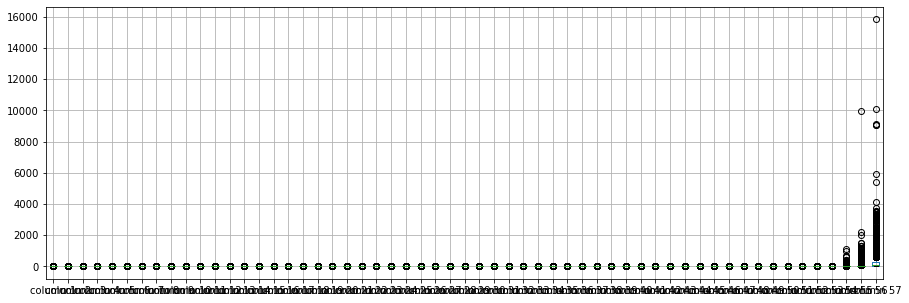

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104625
column 2       0.213332
column 3       0.280433
column 4       0.065553
column 5       0.312767
column 6       0.095928
column 7       0.114495
column 8       0.105462
column 9       0.090286
column 10      0.239839
column 11      0.060007
column 12      0.540429
column 13      0.093774
column 14      0.058791
column 15      0.048754
column 16      0.248729
column 17      0.142942
column 18      0.183826
column 19      1.661710
column 20      0.085895
column 21      0.808561
column 22      0.121307
column 23      0.101969
column 24      0.094014
column 25      0.549669
column 26      0.262813
column 27      0.768809
column 28      0.124546
column 29      0.099330
column 30      0.103751
column 31      0.065059
column 32      0.047164
column 33      0.097313
column 34      0.048316
column 35      0.105773
column 36      0.098070
column 37      0.136753
column 38      0.013242
column 39      0.078814
column 40      0.065377
column 41      0.043572
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016688,0.065814,0.013433,0.023217,0.059646,0.007714,-0.003896,0.106065,0.041005,...,-0.017181,-0.026249,-0.020571,-0.032838,0.058167,0.119338,-0.008425,0.044986,0.062217,0.088944
column 2,-0.016688,1.000000,-0.033406,-0.006944,-0.023982,-0.024947,0.003831,-0.016412,-0.003997,0.032780,...,-0.015622,-0.007171,-0.050450,-0.018378,-0.014739,-0.009726,0.002094,0.001697,0.000630,-0.023410
column 3,0.065814,-0.033406,1.000000,-0.020235,0.077596,0.087841,0.036629,0.012338,0.093700,0.032093,...,-0.025495,-0.033152,-0.016117,-0.033797,0.108479,0.088555,-0.003043,0.097113,0.107305,0.069183
column 4,0.013433,-0.006944,-0.020235,1.000000,0.003203,-0.010026,0.019738,0.010238,-0.002485,-0.004998,...,-0.001652,-0.000327,-0.010346,-0.007175,-0.003165,0.010804,-0.000385,0.005211,0.020829,0.021275
column 5,0.023217,-0.023982,0.077596,0.003203,1.000000,0.053759,0.147045,0.029262,0.020329,0.034315,...,-0.031514,-0.033193,-0.046645,-0.034444,0.024307,0.041699,0.002185,0.052774,0.050116,0.001354
column 6,0.059646,-0.024947,0.087841,-0.010026,0.053759,1.000000,0.060946,0.079451,0.117867,0.013746,...,-0.031275,-0.019340,-0.009028,-0.014173,0.064800,0.105501,0.020071,-0.010998,0.084963,0.079636
column 7,0.007714,0.003831,0.036629,0.019738,0.147045,0.060946,1.000000,0.044320,0.050523,0.056646,...,-0.031279,-0.033419,-0.054789,-0.027301,0.052882,0.069653,0.046462,0.041528,0.058954,-0.009293
column 8,-0.003896,-0.016412,0.012338,0.010238,0.029262,0.079451,0.044320,1.000000,0.105133,0.082917,...,-0.020889,-0.027788,-0.033269,-0.019012,0.031281,0.057370,-0.008026,0.010736,0.036567,0.037302
column 9,0.106065,-0.003997,0.093700,-0.002485,0.020329,0.117867,0.050523,0.105133,1.000000,0.130235,...,-0.025688,-0.014635,-0.031815,0.015260,0.043225,0.148854,-0.000557,0.112504,0.186130,0.248662
column 10,0.041005,0.032780,0.032093,-0.004998,0.034315,0.013746,0.056646,0.082917,0.130235,1.000000,...,-0.016210,0.011561,0.003326,0.008925,0.036455,0.075448,0.044805,0.072609,0.103383,0.085896


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 681.1822457130778
Epoch: 1 , loss: 672.2319283834318
Epoch: 2 , loss: 669.9457658508513
Epoch: 3 , loss: 668.671395225392
Epoch: 4 , loss: 679.1825991640522
Epoch: 5 , loss: 676.2491102052483
Epoch: 6 , loss: 668.6647329297215
Epoch: 7 , loss: 672.0775424279402
Epoch: 8 , loss: 676.2637228351022
Epoch: 9 , loss: 669.6526475966184
Epoch: 10 , loss: 667.4351532833086
Epoch: 11 , loss: 661.097523333719
Epoch: 12 , loss: 670.7904432874939
Epoch: 13 , loss: 677.1966366119916
Epoch: 14 , loss: 667.1960047279916
Epoch: 15 , loss: 667.4549460593831
Epoch: 16 , loss: 654.1353775981411
Epoch: 17 , loss: 640.083714714449
Epoch: 18 , loss: 617.3506274073796
Epoch: 19 , loss: 577.3403519952755
Epoch: 20 , loss: 578.7344660742358
Epoch: 21 , loss: 556.5665000888944
Epoch: 22 , loss: 557.3002137240633
Epoch: 23 , loss: 573.3027649723279
Epoch: 24 , loss: 576.5984629454929
Epoch: 25 , loss: 585.4442131228564
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

3315.7370137994676

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.06986580435463344

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [21]:
imputations[-1].to_excel("Spam_AL_1(imp).xlsx", index=False, header=False)